<a href="https://colab.research.google.com/github/QeyCoder/Browsing-Pattern-Analysis/blob/master/browser_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import json as js


In [140]:
!pip3 install tldextract

In [0]:
with open('BrowserHistory.json') as f:
  data = js.loads(f.read())
  df = pd.DataFrame(data['Browser History'])

In [0]:
df.drop('favicon_url', axis=1,inplace=True)

In [0]:
df.drop('client_id', axis=1,inplace=True)

In [0]:
import datetime
def convert_time(x):    return datetime.datetime.fromtimestamp(x/1000000)

In [0]:
days_arr = ["Mon","Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

In [0]:
def get_day_of_week(x):
  return days_arr[x.weekday()]

In [0]:
import tldextract
def get_domain(x):
  domain= tldextract.extract(x)[1]
  sub_domain= tldextract.extract(x)[0]
  if sub_domain == "mail":        
    return sub_domain + "." + domain  
  elif domain == "google" and sub_domain=="www":
       return "google_search"
  return domain

In [0]:
df['dt'] = df['time_usec'].apply(convert_time)
df['domain'] = df['url'].apply(get_domain)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116490 entries, 0 to 116489
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   page_transition  116490 non-null  object        
 1   title            116490 non-null  object        
 2   url              116490 non-null  object        
 3   time_usec        116490 non-null  int64         
 4   dt               116490 non-null  datetime64[ns]
 5   domain           116490 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 5.3+ MB


In [0]:
def fetch_category(x):
  x= x.lower()
  if x in ['employee','mail','outlook']:
    return 'Office'
  elif x in ['google','gmail']:
    return 'google'
  elif x in ['mL','kaggle','coursera','plural','edx']: 
    return 'learn'
  else :
    return 'other' 


In [0]:
df['category']= df['domain'].apply(fetch_category)

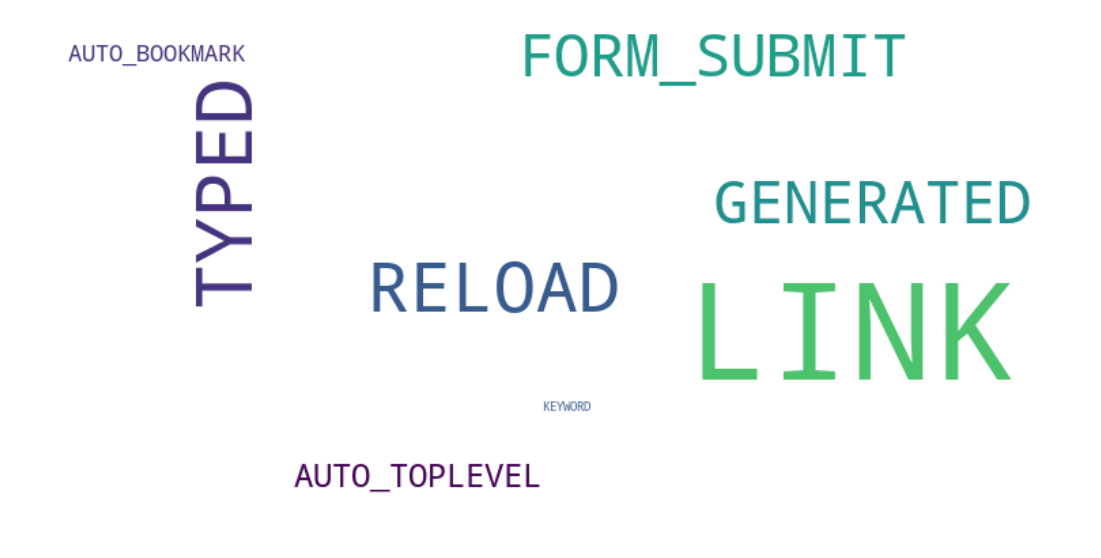

In [164]:
df=df[df['url']!='chrome://newtab/']
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,max_font_size=100, max_words=50, background_color="white")
series=df['page_transition'].value_counts()
wordcloud.generate_from_frequencies(frequencies=series.to_dict())
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()